In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support, accuracy_score

In [27]:
np.random.seed(42)
iris=datasets.load_iris()
X=iris['data'][:,(2,3)]
y=iris['target']

In [28]:
np.random.seed(42)
X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=0.2)

In [29]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
scores=cross_val_score(tree,X_train, y_train,scoring='accuracy',cv=3)
print(f"Mean={scores.mean()},Standard Deviation={scores.std()}")

Mean=0.9414425682718365,Standard Deviation=0.03129331318093283


In [30]:
train_target=cross_val_predict(tree, X_train, y_train, cv=3)
precision_recall_fscore_support(y_train,train_target, average='micro')

(0.9166666666666666, 0.9166666666666666, 0.9166666666666666, None)

In [31]:
predicted=tree.predict(X_test)
precision_recall_fscore_support(y_test,predicted, average='micro')
accuracy_score(y_test,predicted)*100

100.0

In [32]:
X[y==1].mean(axis=0),X[y==1].std(axis=0),iris.feature_names, iris.target_names

(array([4.26 , 1.326]),
 array([0.46518813, 0.19576517]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

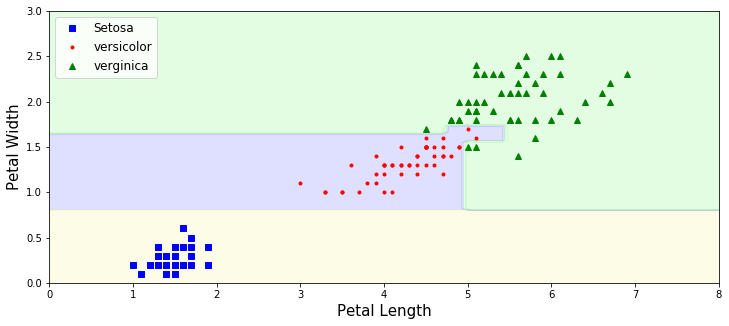

In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
np.random.seed(42)
X=iris['data'][:,(2,3)]
plt.figure(figsize=(12,5))
X1_=np.linspace(0,8,100)
X2_=np.linspace(0,3,100)
X1,X2=np.meshgrid(X1_,X2_)
X_=np.c_[X1.ravel(),X2.ravel()]
mesh_predict=tree.predict(X_).reshape(X1.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(X1,X2,mesh_predict,cmap=custom_cmap,alpha=0.3)
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs", label="Setosa")
plt.plot(X[:,0][y==1],X[:,1][y==1],"r.", label="versicolor")
plt.plot(X[:,0][y==2],X[:,1][y==2],"g^", label="verginica")
plt.axis([0,8,0,3])
plt.xlabel("Petal Length", fontsize=15)
plt.ylabel("Petal Width", fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [61]:
data=datasets.make_moons(n_samples=100,random_state=42,noise=0.15)
X=data[0]
y=np.random.randint(2,size=(100,))

In [76]:
tree=DecisionTreeClassifier()
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

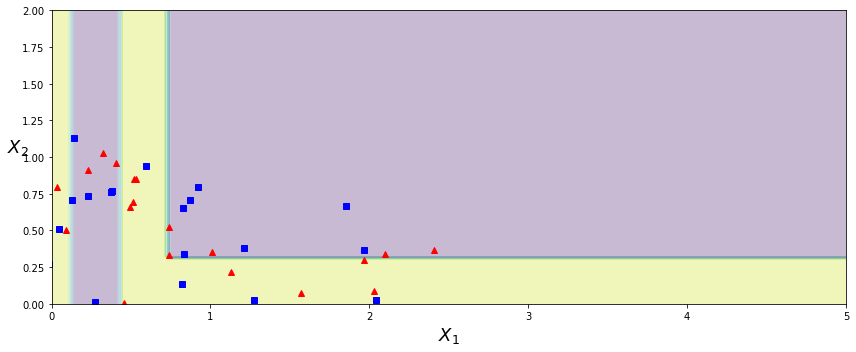

In [75]:
plt.figure(figsize=(12,5))
x1=np.linspace(0,5,100)
x2=np.linspace(0,2,100)
x1_,x2_=np.meshgrid(x1,x2)
X_new=np.c_[x1_.ravel(),x2_.ravel()]
mesh_predict=tree.predict(X_new).reshape(100,100)
plt.contourf(x1_,x2_,mesh_predict,alpha=0.3)
plt.plot(X[:,0][y==0],X[:,1][y==0], "bs")
plt.plot(X[:,0][y==1],X[:,1][y==1], "r^")
plt.axis([0,5,0,2])
plt.xlabel(r"$X_1$",fontsize=18)
plt.ylabel(r"$X_2$",rotation=0,fontsize=18)
plt.tight_layout()
plt.show()